# Classification Assignment
#### Problem Statement or Requirement:

###### A requirement from the Hospital, Management asked us to create a predictive model which will predict the Chronic Kidney Disease (CKD) based on the several parameters. The Client has provided the dataset of the same.

###### 1.) Identify your problem statement

###### 2.) Tell basic info about the dataset (Total number of rows, columns)

###### 3.) Mention the pre-processing method if you’re doing any (like converting string to number – nominal data)

###### 4.) Develop a good model with good evaluation metric. You can use any machine learning algorithm; you can create many models. Finally, you have to come up with final model.

###### 5.) All the research values of each algorithm should be documented. (You can make tabulation or screenshot of the results.)

###### 6.) Mention your final model, justify why u have chosen the same.

1. The hospital wants a reliable predictive model to classify patients into CKD (Chronic Kidney Disease) or Not CKD, using medical attributes.
You are tasked with building the best-performing classification model, evaluated using precision, recall, f1-score, and accuracy.

Domain: ML

Type: Supervised Learning

Objective: Binary Classification

In [2]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Reading the Dataset
dataset = pd.read_csv('CKD.csv')


2. Tell basic info about the dataset (Total number of rows, columns)

In [4]:
print(f"\nRows: {dataset.shape[0]}")
print(f"\nColumns: {dataset.shape[1]}\n\n")

display(dataset)

# Displaying the dataset information
display(dataset.info())



Rows: 399

Columns: 25




,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.000000,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.000000,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.000000,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.000000,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.000000,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,219.000000,...,37.000000,9800.000000,4.400000,no,no,no,yes,poor,no,yes
395,51.492308,70.000000,c,0.0,2.0,normal,normal,notpresent,notpresent,220.000000,...,27.000000,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes
396,51.492308,70.000000,c,3.0,0.0,normal,normal,notpresent,notpresent,110.000000,...,26.000000,9200.000000,3.400000,yes,yes,no,poor,poor,no,yes
397,51.492308,90.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,207.000000,...,38.868902,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             399 non-null    float64
 1   bp              399 non-null    float64
 2   sg              399 non-null    object 
 3   al              399 non-null    float64
 4   su              399 non-null    float64
 5   rbc             399 non-null    object 
 6   pc              399 non-null    object 
 7   pcc             399 non-null    object 
 8   ba              399 non-null    object 
 9   bgr             399 non-null    float64
 10  bu              399 non-null    float64
 11  sc              399 non-null    float64
 12  sod             399 non-null    float64
 13  pot             399 non-null    float64
 14  hrmo            399 non-null    float64
 15  pcv             399 non-null    float64
 16  wc              399 non-null    float64
 17  rc              399 non-null    flo

None

3.) Mention the pre-processing method if you’re doing any (like converting string to number – nominal data)

In [5]:
# Converting categorical variables to numerical
# as the classification column is categorical - ordinal data, will be converted to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle categorical and numerical separately
categorical_cols = dataset.select_dtypes(include='object').columns
numerical_cols = dataset.select_dtypes(exclude='object').columns

# Fill missing values
dataset[categorical_cols] = dataset[categorical_cols].fillna(dataset[categorical_cols].mode().iloc[0])
dataset[numerical_cols] = dataset[numerical_cols].fillna(dataset[numerical_cols].mean())

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le


4. Develop a good model with good evaluation metric. You can use any machine learning algorithm; you can create many models. Finally, you have to come up with final model.

# RandomForest

In [6]:
# Splitting the dataset into independent and dependent variables
independent = dataset.drop('classification', axis=1)
dependent = dataset['classification']


In [7]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 0)


In [8]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100, 200, 300],
              'max_features':['auto', 'sqrt', 'log2'],
              'min_samples_split':[2, 5, 10],
              'bootstrap':[True, False]} 



grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=300;, score=nan total time=   0.0s
[C

/home/deehub/anaconda3/envs/AI/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/home/deehub/anaconda3/envs/AI/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/deehub/anaconda3/envs/AI/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/home/deehub/anaconda3/envs/AI/lib/python3.

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted', verbose=3)

In [10]:
# print best parameter after tuning 
#print(grid.best_params_) 
result = grid.cv_results_
#print(result)
grid_predictions = grid.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, grid_predictions)

# print classification report 
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, grid_predictions)


In [11]:

from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)


The f1_macro value for best parameter {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}: 0.9924667654735397


In [12]:
print("The confusion Matrix:\n", confusion_matrix)


The confusion Matrix:
 [[50  1]
 [ 0 82]]


In [13]:
print("\nThe report using RandomForestClassifier :\n\n\n", classification_report)



The report using RandomForestClassifier :


               precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.99      1.00      0.99        82

    accuracy                           0.99       133
   macro avg       0.99      0.99      0.99       133
weighted avg       0.99      0.99      0.99       133



In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])


np.float64(1.0)

In [15]:
table=pd.DataFrame.from_dict(result)
table


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002019,0.000337,0.000000,0.000000,True,auto,2,100,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
1,0.002393,0.001107,0.000000,0.000000,True,auto,2,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
2,0.001476,0.000139,0.000000,0.000000,True,auto,2,300,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
3,0.002434,0.000860,0.000000,0.000000,True,auto,5,100,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
4,0.003000,0.003294,0.000000,0.000000,True,auto,5,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
5,0.002167,0.001672,0.000000,0.000000,True,auto,5,300,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
6,0.002392,0.001710,0.000000,0.000000,True,auto,10,100,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
7,0.003277,0.001774,0.000000,0.000000,True,auto,10,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
8,0.004441,0.001921,0.000000,0.000000,True,auto,10,300,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
9,0.867569,0.300743,0.052229,0.031300,True,sqrt,2,100,"{'bootstrap': True, 'max_features': 'sqrt', 'm...",1.0,0.961755,0.981217,0.962264,1.000000,0.981047,0.016991,5



Model saved to random_forest_classification_model.sav and loaded successfully, but predictions do NOT match!

Number of mismatches: 1
Indices of mismatches: [36]
Best parameters found: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}

Best score achieved: 0.9886555957105589

Feature importances: [5.45378824e-03 1.14580006e-02 1.09374801e-01 5.55380511e-02
 7.18205046e-03 3.04305786e-03 5.36216606e-03 1.65807743e-04
 0.00000000e+00 3.95443188e-02 2.49318515e-02 1.54922492e-01
 1.95550676e-02 3.44568438e-03 2.05607660e-01 1.21294160e-01
 6.01661654e-03 1.03205150e-01 4.77069326e-02 6.25884267e-02
 0.00000000e+00 3.75556359e-03 4.48133276e-03 5.36702109e-03]

Feature names: ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

Feature importances sorted by importance:
    Feature  Importance
14    hrmo    0.205608
11      sc    0.154922
15   

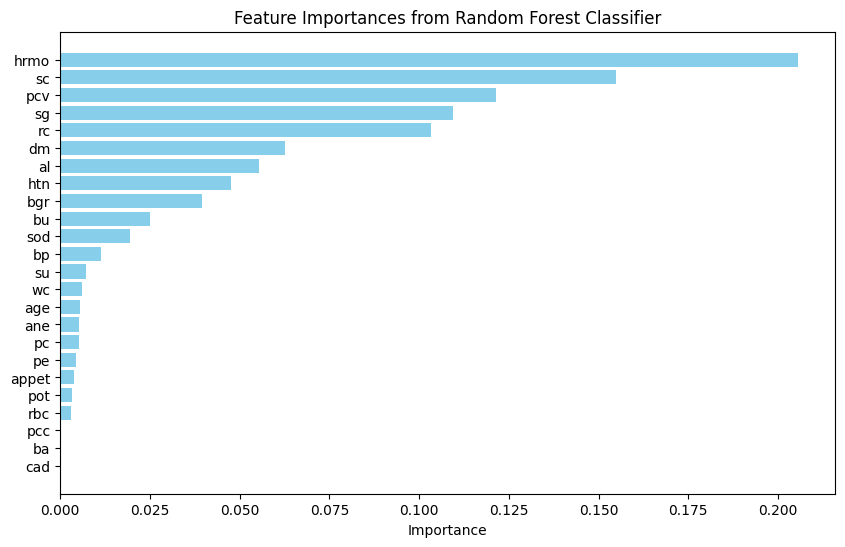

In [19]:
import pickle
# Save the model to a file
good_fit_model_filename = "random_forest_classification_model.sav"
pickle.dump(grid, open(good_fit_model_filename, 'wb'))
# Load the model from a file
loaded_model = pickle.load(open(good_fit_model_filename, 'rb'))
# Make predictions using the loaded model
loaded_predictions = loaded_model.predict(X_test)

# Check if the loaded predictions match the original predictions
if np.array_equal(grid_predictions, loaded_predictions):
	print(f"\nModel saved to {good_fit_model_filename} and loaded successfully. Predictions match.\n")
else:
	print(f"\nModel saved to {good_fit_model_filename} and loaded successfully, but predictions do NOT match!\n")
	# Optionally, print mismatches for debugging
	mismatches = np.where(grid_predictions != loaded_predictions)[0]
	print(f"Number of mismatches: {len(mismatches)}")
	print(f"Indices of mismatches: {mismatches}")
 
# Display the best parameters found by GridSearchCV
print(f"Best parameters found: {grid.best_params_}\n")

# Display the best score achieved by GridSearchCV
print(f"Best score achieved: {grid.best_score_}\n")

# Display the feature importances
importances = grid.best_estimator_.feature_importances_
print(f"Feature importances: {importances}\n")
# Display the feature names
feature_names = independent.columns
print(f"Feature names: {feature_names.tolist()}\n")
# Display the feature importances in a DataFrame
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the sorted feature importances
print("Feature importances sorted by importance:\n", feature_importances_df)
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()          
